In [37]:
import pandas as pd
import numpy as np


In [38]:
data=pd.read_csv('Churn_Modelling.csv')

In [39]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [40]:
X=data.iloc[:,3:13]
X
y=data.iloc[:,13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [43]:
X_encoded=pd.get_dummies(X,columns=['Gender','Geography'])
X_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,True,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,True,False,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,True,False,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,True,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,False,True,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,True,False,True,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,False,True,False,True,False


In [44]:
X=X_encoded

In [31]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,True,False,True,True,False


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [48]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ReLU,LeakyReLU,Dense,Dropout,Input

In [68]:
model=Sequential()
model.add(Input(shape=(13,)))
model.add(Dropout(0.3))
model.add(Dense(6,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model.add(Dense(6,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_normal'))

In [69]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
y_train.shape

(7500,)

In [52]:
X_train.shape

(7500, 13)

In [70]:
model_hist=model.fit(X_train,y_train,validation_split=0.33,batch_size=32,epochs=100)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4986 - loss: 0.9128 - val_accuracy: 0.6797 - val_loss: 0.6231
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7385 - loss: 0.5973 - val_accuracy: 0.8037 - val_loss: 0.4977
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7812 - loss: 0.5206 - val_accuracy: 0.8053 - val_loss: 0.4728
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7866 - loss: 0.5081 - val_accuracy: 0.8049 - val_loss: 0.4676
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7884 - loss: 0.5037 - val_accuracy: 0.8049 - val_loss: 0.4634
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.4944 - val_accuracy: 0.8049 - val_loss: 0.4593
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.4998 - val_accuracy: 0.8049 - val_loss: 0.4573
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4907 - val_accu

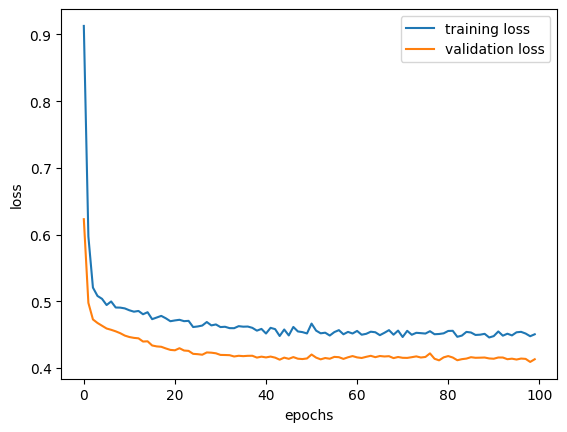

In [71]:
import matplotlib.pyplot as plt

plt.plot(model_hist.history['loss'],label='training loss')
plt.plot(model_hist.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()